# Environment

In [25]:
import pandas as pd
import pybedtools
from pybedtools import BedTool
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

wd_dir = '/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_CUTandTAG/iterative_alternative'
os.chdir(wd_dir)

1. **Signal Ratio (`signal_ratio`)**
    
    - Calculates: Average signal value in exogenous samples / Average signal value in endogenous samples
    - Interpretation:
        - Values > 1: Stronger binding in exogenous samples
        - Values < 1: Stronger binding in endogenous samples
        - Value = inf: Peaks only in exogenous samples
        - Value = 0: No peaks in exogenous samples
2. **Peak Count Ratio (`peak_count`)**
    
    - Calculates: Number of peaks in exogenous / Number of peaks in endogenous
    - Interpretation:
        - Values > 1: More peaks in exogenous samples
        - Values < 1: More peaks in endogenous samples
        - Higher values indicate more binding sites
3. **Combined Score (`combined_score`)**
    
    - Calculates: (Mean signal × Number of peaks)exo / (Mean signal × Number of peaks)endo
    - Interpretation:
        - Combines both signal strength and peak frequency
        - Values > 1: Stronger overall enrichment in exogenous
        - Values < 1: Stronger overall enrichment in endogenous
        - Accounts for both quantity and quality of peaks
4. **Statistical Enrichment (`statistical`)**
    
    - Calculates: Fisher's exact test p-value comparing peak presence
    - Interpretation:
        - Lower p-values (closer to 0): Significant difference in peak distribution
        - Higher p-values (closer to 1): No significant difference
        - NaN: No peaks in either condition
5. **Width-Weighted Signal (`width_weighted`)**
    
    - Calculates: Sum(signal × peak width)exo / Sum(signal × peak width)endo
    - Interpretation:
        - Accounts for both signal strength and peak size
        - Values > 1: Stronger binding considering peak width in exogenous
        - Values < 1: Stronger binding considering peak width in endogenous
        - Good for identifying broad vs narrow peaks
6. **Coverage Score (`coverage_score`)**
    
    - Calculates: (Total peak width × Mean signal)exo / (Total peak width × Mean signal)endo
    - Interpretation:
        - Similar to width-weighted but emphasizes total genomic coverage
        - Values > 1: Greater coverage in exogenous
        - Values < 1: Greater coverage in endogenous
        - Useful for identifying differences in binding patterns
7. **Area Integration (`area_integration`)**
    
    - Calculates: Sum(width × signal × -log10(qValue))exo / Sum(width × signal × -log10(qValue))endo
    - Interpretation:
        - Most comprehensive score incorporating:
            - Peak width
            - Signal strength
            - Statistical significance (qValue)
        - Values > 1: Stronger, more significant binding in exogenous
        - Values < 1: Stronger, more significant binding in endogenous
        - Best for overall binding strength assessment

**General Interpretation Guidelines:**

1. For all methods except `statistical`:
    
    - Values > 1 indicate stronger enrichment in exogenous samples
    - Values < 1 indicate stronger enrichment in endogenous samples
    - Value = 0 indicates no peaks in exogenous samples

# NSC analysis

In [53]:
nsc_area_integration_1 = pd.read_csv('results/enrichment_area_integration_NSC.csv')
nsc_combined_score_1 = pd.read_csv('results/enrichment_combined_score_NSC.csv')
nsc_coverage_score_1 = pd.read_csv('results/enrichment_coverage_score_NSC.csv')
nsc_peak_count_1 = pd.read_csv('results/enrichment_peak_count_NSC.csv')
nsc_signal_ratio_1 = pd.read_csv('results/enrichment_signal_ratio_NSC.csv')
nsc_statistical_1 = pd.read_csv('results/enrichment_statistical_NSC.csv')
nsc_width_weighted_1 = pd.read_csv('results/enrichment_width_weighted_NSC.csv')
nsc_summary_1 = pd.read_csv('results/enrichment_summary_NSC.csv')

In [54]:
nsc_summary_1

,Unnamed: 0,median_enrichment,mean_enrichment,std_enrichment,num_genes,significant_genes,median_log2FC,mean_log2FC,median_padj,highly_significant
0,signal_ratio,0.000000,0.261876,0.407143,118.0,9.0,0.771218,0.850681,8.505010e-19,2.0
1,peak_count,0.666667,0.680702,0.228539,38.0,0.0,0.803191,0.823178,5.760505e-20,0.0
2,combined_score,0.000000,0.173541,0.282455,118.0,3.0,0.771218,0.850681,8.505010e-19,1.0
3,statistical,1.000000,0.939948,0.167377,38.0,0.0,0.803191,0.823178,5.760505e-20,0.0
4,width_weighted,0.000000,0.185725,0.305996,118.0,4.0,0.771218,0.850681,8.505010e-19,1.0
5,coverage_score,0.000000,0.184456,0.303167,118.0,3.0,0.771218,0.850681,8.505010e-19,1.0
6,area_integration,0.000000,0.000000,0.000000,80.0,0.0,0.766388,0.863744,1.852995e-18,0.0


In [55]:
nsc_area_integration_1 = nsc_area_integration_1.sort_values(by=['enrichment_score'], ascending=False)
nsc_combined_score_1 = nsc_combined_score_1.sort_values(by=['enrichment_score'], ascending=False)
nsc_coverage_score_1 = nsc_coverage_score_1.sort_values(by=['enrichment_score'], ascending=False)
nsc_peak_count_1 = nsc_peak_count_1.sort_values(by=['enrichment_score'], ascending=False)
nsc_signal_ratio_1 = nsc_signal_ratio_1.sort_values(by=['enrichment_score'], ascending=False)
nsc_statistical_1 = nsc_statistical_1.sort_values(by=['enrichment_score'], ascending=False)
nsc_width_weighted_1 = nsc_width_weighted_1.sort_values(by=['enrichment_score'], ascending=False)

In [56]:
# Save gene lists to CSV files
nsc_area_integration_1['gene'].to_csv('results/genes_area_integration_NSC.csv', index=False)
nsc_combined_score_1['gene'].to_csv('results/genes_combined_score_NSC.csv', index=False)
nsc_coverage_score_1['gene'].to_csv('results/genes_coverage_score_NSC.csv', index=False)
nsc_peak_count_1['gene'].to_csv('results/genes_peak_count_NSC.csv', index=False)
nsc_signal_ratio_1['gene'].to_csv('results/genes_signal_ratio_NSC.csv', index=False)
nsc_statistical_1['gene'].to_csv('results/genes_statistical_NSC.csv', index=False)
nsc_width_weighted_1['gene'].to_csv('results/genes_width_weighted_NSC.csv', index=False)

In [57]:
nsc_coverage_score_1.head(3)

,gene,enrichment_score,log2FoldChange,padj,exo_peaks,endo_peaks,num_exo_peaks,num_endo_peaks
36,Ranbp10,1.144017,0.648223,1.974620e-13,chr8:105826570-105827802,chr8:105827133-105827804;chr8:105826818-105827802,1,2
102,Dock4,1.136343,1.004184,3.697230e-43,chr12:40445607-40447364;chr12:40445331-40446416,chr12:40445512-40446375;chr12:40445259-40447045,2,2
42,Sap130,1.036662,0.577050,2.091730e-14,chr18:31633903-31635382;chr18:31633914-31635345,chr18:31633771-31635375;chr18:31633828-31635394,2,2


In [58]:
nsc_width_weighted_1.head(3)

,gene,enrichment_score,log2FoldChange,padj,exo_peaks,endo_peaks,num_exo_peaks,num_endo_peaks
102,Dock4,1.151985,1.004184,3.697230e-43,chr12:40445607-40447364;chr12:40445331-40446416,chr12:40445512-40446375;chr12:40445259-40447045,2,2
36,Ranbp10,1.139832,0.648223,1.974620e-13,chr8:105826570-105827802,chr8:105827133-105827804;chr8:105826818-105827802,1,2
42,Sap130,1.037242,0.577050,2.091730e-14,chr18:31633903-31635382;chr18:31633914-31635345,chr18:31633771-31635375;chr18:31633828-31635394,2,2


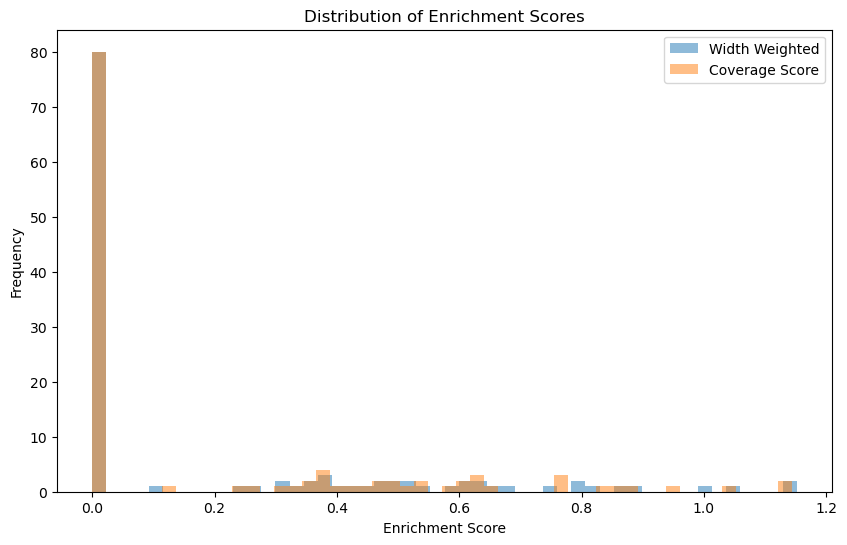

In [59]:
# Plot histograms of enrichment scores
plt.figure(figsize=(10, 6))

plt.hist(nsc_width_weighted_1.enrichment_score, alpha=0.5, label='Width Weighted', bins=50)
plt.hist(nsc_coverage_score_1.enrichment_score, alpha=0.5, label='Coverage Score', bins=50)

plt.xlabel('Enrichment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Enrichment Scores')
plt.legend()

# NSC alternative analysis

In [30]:
nsc_area_integration_2 = pd.read_csv('results_alternative/enrichment_area_integration_NSC.csv')
nsc_combined_score_2 = pd.read_csv('results_alternative/enrichment_combined_score_NSC.csv')
nsc_coverage_score_2 = pd.read_csv('results_alternative/enrichment_coverage_score_NSC.csv')
nsc_peak_count_2 = pd.read_csv('results_alternative/enrichment_peak_count_NSC.csv')
nsc_signal_ratio_2 = pd.read_csv('results_alternative/enrichment_signal_ratio_NSC.csv')
nsc_statistical_2 = pd.read_csv('results_alternative/enrichment_statistical_NSC.csv')
nsc_width_weighted_2 = pd.read_csv('results_alternative/enrichment_width_weighted_NSC.csv')
nsc_summary_2 = pd.read_csv('results_alternative/enrichment_summary_NSC.csv')

In [31]:
nsc_summary_2

,Unnamed: 0,median_enrichment,mean_enrichment,std_enrichment,num_genes,significant_genes,median_log2FC,mean_log2FC,median_padj,highly_significant
0,signal_ratio,1.129461,inf,NaN,2551.0,1547.0,0.905278,1.217152,2.032070e-14,679.0
1,peak_count,1.166667,1.386292,0.918144,2445.0,1356.0,0.898341,1.196908,1.235020e-14,580.0
2,combined_score,1.265893,1.736845,1.836339,2474.0,1649.0,0.900094,1.210799,1.263345e-14,713.0
3,statistical,0.803619,0.777603,0.259556,2445.0,0.0,0.898341,1.196908,1.235020e-14,0.0
4,width_weighted,1.414712,2.176153,2.853511,2474.0,1694.0,0.900094,1.210799,1.263345e-14,728.0
5,coverage_score,1.358194,2.041261,2.553237,2474.0,1669.0,0.900094,1.210799,1.263345e-14,722.0
6,area_integration,0.000000,0.000000,0.000000,2474.0,0.0,0.900094,1.210799,1.263345e-14,0.0


In [9]:
nsc_signal_ratio_2.replace([np.inf, -np.inf], np.nanmax(nsc_signal_ratio_2.enrichment_score[nsc_signal_ratio_2.enrichment_score != np.inf])
*2, inplace=True)

In [32]:
nsc_area_integration_2 = nsc_area_integration_2.sort_values(by=['enrichment_score'], ascending=False)
nsc_combined_score_2 = nsc_combined_score_2.sort_values(by=['enrichment_score'], ascending=False)
nsc_coverage_score_2 = nsc_coverage_score_2.sort_values(by=['enrichment_score'], ascending=False)
nsc_peak_count_2 = nsc_peak_count_2.sort_values(by=['enrichment_score'], ascending=False)
nsc_signal_ratio_2 = nsc_signal_ratio_2.sort_values(by=['enrichment_score'], ascending=False)
nsc_statistical_2 = nsc_statistical_2.sort_values(by=['enrichment_score'], ascending=False)
nsc_width_weighted_2 = nsc_width_weighted_2.sort_values(by=['enrichment_score'], ascending=False)

In [60]:
# Save gene lists to CSV files
nsc_area_integration_2['gene'].to_csv('results_alternative/genes_area_integration_NSC.csv', index=False)
nsc_combined_score_2['gene'].to_csv('results_alternative/genes_combined_score_NSC.csv', index=False)
nsc_coverage_score_2['gene'].to_csv('results_alternative/genes_coverage_score_NSC.csv', index=False)
nsc_peak_count_2['gene'].to_csv('results_alternative/genes_peak_count_NSC.csv', index=False)
nsc_signal_ratio_2['gene'].to_csv('results_alternative/genes_signal_ratio_NSC.csv', index=False)
nsc_statistical_2['gene'].to_csv('results_alternative/genes_statistical_NSC.csv', index=False)
nsc_width_weighted_2['gene'].to_csv('results_alternative/genes_width_weighted_NSC.csv', index=False)

In [61]:
nsc_coverage_score_2.head(3)

,gene,enrichment_score,log2FoldChange,padj,exo_peaks,endo_peaks,num_exo_peaks,num_endo_peaks
338,Gm42517,42.101225,0.980299,2.283420e-04,chr5:108366642-108366888;chr5:108367151-108367...,chr5:108365156-108365298,6,1
2441,Ddx60,30.646148,7.009645,6.441800e-199,chr8:61927710-61928567;chr8:61929487-61929682;...,chr8:61925838-61926107,5,1
370,Itga11,24.891525,1.103004,1.142540e-04,chr9:62677683-62677864;chr9:62678073-62678528;...,chr9:62677808-62678045,6,1


In [62]:
nsc_width_weighted_2.head(3)

,gene,enrichment_score,log2FoldChange,padj,exo_peaks,endo_peaks,num_exo_peaks,num_endo_peaks
338,Gm42517,48.370235,0.980299,2.283420e-04,chr5:108366642-108366888;chr5:108367151-108367...,chr5:108365156-108365298,6,1
2441,Ddx60,41.817859,7.009645,6.441800e-199,chr8:61927710-61928567;chr8:61929487-61929682;...,chr8:61925838-61926107,5,1
1930,Muc15,28.132272,1.478653,8.611190e-33,chr2:110719729-110720081;chr2:110721469-110721...,chr2:110721995-110722339,5,1


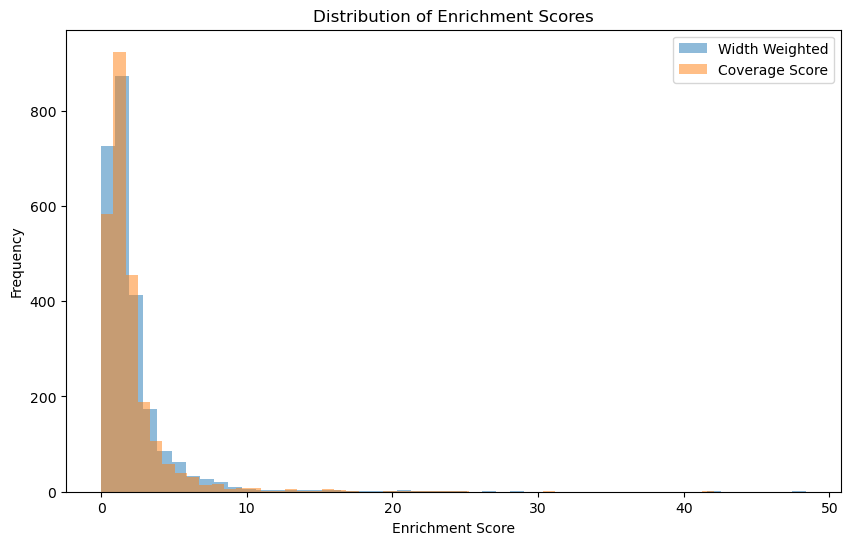

In [63]:
# Plot histograms of enrichment scores
plt.figure(figsize=(10, 6))

plt.hist(nsc_width_weighted_2.enrichment_score, alpha=0.5, label='Width Weighted', bins=50)
plt.hist(nsc_coverage_score_2.enrichment_score, alpha=0.5, label='Coverage Score', bins=50)

plt.xlabel('Enrichment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Enrichment Scores')
plt.legend()

# NEU analysis

In [38]:
neu_area_integration_1 = pd.read_csv('results/enrichment_area_integration_NEU.csv')
neu_combined_score_1 = pd.read_csv('results/enrichment_combined_score_NEU.csv')
neu_coverage_score_1 = pd.read_csv('results/enrichment_coverage_score_NEU.csv')
neu_peak_count_1 = pd.read_csv('results/enrichment_peak_count_NEU.csv')
neu_signal_ratio_1 = pd.read_csv('results/enrichment_signal_ratio_NEU.csv')
neu_statistical_1 = pd.read_csv('results/enrichment_statistical_NEU.csv')
neu_width_weighted_1 = pd.read_csv('results/enrichment_width_weighted_NEU.csv')
neu_summary_1 = pd.read_csv('results/enrichment_summary_NEU.csv')

In [39]:
neu_summary_1

,Unnamed: 0,median_enrichment,mean_enrichment,std_enrichment,num_genes,significant_genes,median_log2FC,mean_log2FC,median_padj,highly_significant
0,signal_ratio,1.233965,inf,NaN,18.0,14.0,0.615820,0.709475,0.000032,2.0
1,peak_count,1.500000,1.590909,0.539360,11.0,9.0,0.656623,0.697927,0.000003,1.0
2,combined_score,1.670629,1.586931,0.646969,12.0,11.0,0.615820,0.681889,0.000012,1.0
3,statistical,1.000000,0.965905,0.113081,11.0,0.0,0.656623,0.697927,0.000003,0.0
4,width_weighted,2.140376,2.146808,1.000749,12.0,11.0,0.615820,0.681889,0.000012,1.0
5,coverage_score,2.147438,2.189799,1.043587,12.0,11.0,0.615820,0.681889,0.000012,1.0
6,area_integration,0.000000,0.000000,NaN,1.0,0.0,0.505468,0.505468,0.025964,0.0


In [40]:
neu_signal_ratio_1.replace([np.inf, -np.inf], np.nanmax(neu_signal_ratio_1.enrichment_score[neu_signal_ratio_1.enrichment_score != np.inf])
*2, inplace=True)

In [41]:
neu_area_integration_1 = neu_area_integration_1.sort_values(by=['enrichment_score'], ascending=False)
neu_combined_score_1 = neu_combined_score_1.sort_values(by=['enrichment_score'], ascending=False)
neu_coverage_score_1 = neu_coverage_score_1.sort_values(by=['enrichment_score'], ascending=False)
neu_peak_count_1 = neu_peak_count_1.sort_values(by=['enrichment_score'], ascending=False)
neu_signal_ratio_1 = neu_signal_ratio_1.sort_values(by=['enrichment_score'], ascending=False)
neu_statistical_1 = neu_statistical_1.sort_values(by=['enrichment_score'], ascending=False)
neu_width_weighted_1 = neu_width_weighted_1.sort_values(by=['enrichment_score'], ascending=False)

In [64]:
# Save gene lists to CSV files
neu_area_integration_1['gene'].to_csv('results/genes_area_integration_NEU.csv', index=False)
neu_combined_score_1['gene'].to_csv('results/genes_combined_score_NEU.csv', index=False)
neu_coverage_score_1['gene'].to_csv('results/genes_coverage_score_NEU.csv', index=False)
neu_peak_count_1['gene'].to_csv('results/genes_peak_count_NEU.csv', index=False)
neu_signal_ratio_1['gene'].to_csv('results/genes_signal_ratio_NEU.csv', index=False)
neu_statistical_1['gene'].to_csv('results/genes_statistical_NEU.csv', index=False)
neu_width_weighted_1['gene'].to_csv('results/genes_width_weighted_NEU.csv', index=False)

In [42]:
neu_coverage_score_1.head(3)

,gene,enrichment_score,log2FoldChange,padj,exo_peaks,endo_peaks,num_exo_peaks,num_endo_peaks
9,C630043F03Rik,4.553569,1.153112,1.096670e-09,chr4:72197372-72202195;chr4:72199950-72201508;...,chr4:72200481-72201881;chr4:72200614-72201550,3,2
4,Cox14,2.958122,0.527911,5.311060e-05,chr15:99721296-99726342;chr15:99725271-9972630...,chr15:99722951-99726136,3,1
5,Tmem218,2.496315,0.564723,2.183970e-05,chr9:37207660-37208818;chr9:37207694-37208641;...,chr9:37207852-37208805;chr9:37207893-37208571,3,2


In [43]:
neu_width_weighted_1.head(3)

,gene,enrichment_score,log2FoldChange,padj,exo_peaks,endo_peaks,num_exo_peaks,num_endo_peaks
9,C630043F03Rik,4.247318,1.153112,1.096670e-09,chr4:72197372-72202195;chr4:72199950-72201508;...,chr4:72200481-72201881;chr4:72200614-72201550,3,2
4,Cox14,3.115900,0.527911,5.311060e-05,chr15:99721296-99726342;chr15:99725271-9972630...,chr15:99722951-99726136,3,1
5,Tmem218,2.503936,0.564723,2.183970e-05,chr9:37207660-37208818;chr9:37207694-37208641;...,chr9:37207852-37208805;chr9:37207893-37208571,3,2


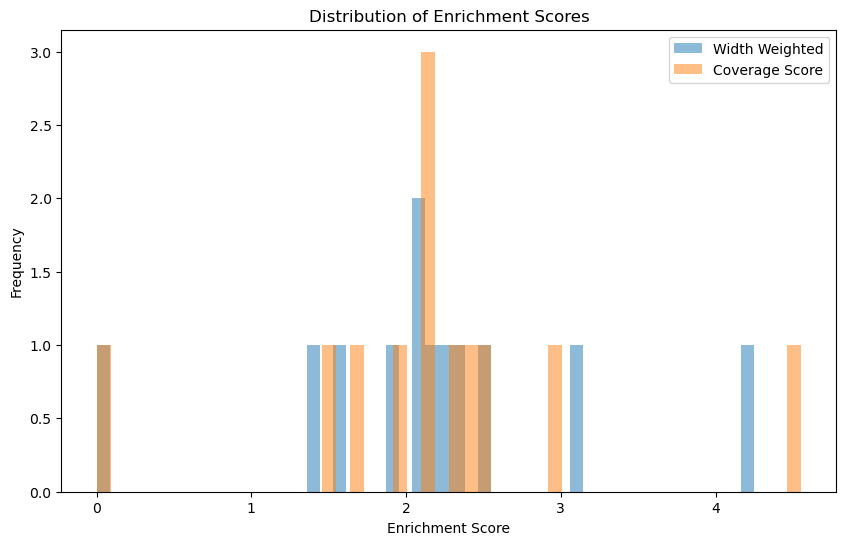

In [44]:
# Plot histograms of enrichment scores
plt.figure(figsize=(10, 6))

plt.hist(neu_width_weighted_1.enrichment_score, alpha=0.5, label='Width Weighted', bins=50)
plt.hist(neu_coverage_score_1.enrichment_score, alpha=0.5, label='Coverage Score', bins=50)

plt.xlabel('Enrichment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Enrichment Scores')
plt.legend()

# NEU analysis alternative

In [45]:
neu_area_integration_2 = pd.read_csv('results_alternative/enrichment_area_integration_NEU.csv')
neu_combined_score_2 = pd.read_csv('results_alternative/enrichment_combined_score_NEU.csv')
neu_coverage_score_2 = pd.read_csv('results_alternative/enrichment_coverage_score_NEU.csv')
neu_peak_count_2 = pd.read_csv('results_alternative/enrichment_peak_count_NEU.csv')
neu_signal_ratio_2 = pd.read_csv('results_alternative/enrichment_signal_ratio_NEU.csv')
neu_statistical_2 = pd.read_csv('results_alternative/enrichment_statistical_NEU.csv')
neu_width_weighted_2 = pd.read_csv('results_alternative/enrichment_width_weighted_NEU.csv')
neu_summary_2 = pd.read_csv('results_alternative/enrichment_summary_NEU.csv')

In [46]:
neu_summary_2

,Unnamed: 0,median_enrichment,mean_enrichment,std_enrichment,num_genes,significant_genes,median_log2FC,mean_log2FC,median_padj,highly_significant
0,signal_ratio,1.030441e+00,inf,NaN,215.0,115.0,0.668863,0.759181,0.000132,16.0
1,peak_count,1.666667e+00,1.914510e+00,1.119738e+00,202.0,164.0,0.667086,0.743763,0.000113,24.0
2,combined_score,1.648339e+00,2.123225e+00,2.206921e+00,210.0,177.0,0.671272,0.761355,0.000120,26.0
3,statistical,7.265622e-01,6.637323e-01,3.176284e-01,202.0,0.0,0.667086,0.743763,0.000113,0.0
4,width_weighted,1.546193e+00,2.246186e+00,3.090772e+00,210.0,156.0,0.671272,0.761355,0.000120,23.0
5,coverage_score,1.549866e+00,2.203278e+00,3.096509e+00,210.0,159.0,0.671272,0.761355,0.000120,23.0
6,area_integration,-6.219486e+10,-1.792725e+11,3.831850e+11,210.0,0.0,0.671272,0.761355,0.000120,0.0


In [47]:
neu_signal_ratio_2.replace([np.inf, -np.inf], np.nanmax(neu_signal_ratio_2.enrichment_score[neu_signal_ratio_2.enrichment_score != np.inf])
*2, inplace=True)

In [65]:
neu_area_integration_2 = neu_area_integration_2.sort_values(by=['enrichment_score'], ascending=False)
neu_combined_score_2 = neu_combined_score_2.sort_values(by=['enrichment_score'], ascending=False)
neu_coverage_score_2 = neu_coverage_score_2.sort_values(by=['enrichment_score'], ascending=False)
neu_peak_count_2 = neu_peak_count_2.sort_values(by=['enrichment_score'], ascending=False)
neu_signal_ratio_2 = neu_signal_ratio_2.sort_values(by=['enrichment_score'], ascending=False)
neu_statistical_2 = neu_statistical_2.sort_values(by=['enrichment_score'], ascending=False)
neu_width_weighted_2 = neu_width_weighted_2.sort_values(by=['enrichment_score'], ascending=False)

In [66]:
# Save gene lists to CSV files
neu_area_integration_2['gene'].to_csv('results_alternative/genes_area_integration_NEU.csv', index=False)
neu_combined_score_2['gene'].to_csv('results_alternative/genes_combined_score_NEU.csv', index=False)
neu_coverage_score_2['gene'].to_csv('results_alternative/genes_coverage_score_NEU.csv', index=False)
neu_peak_count_2['gene'].to_csv('results_alternative/genes_peak_count_NEU.csv', index=False)
neu_signal_ratio_2['gene'].to_csv('results_alternative/genes_signal_ratio_NEU.csv', index=False)
neu_statistical_2['gene'].to_csv('results_alternative/genes_statistical_NEU.csv', index=False)
neu_width_weighted_2['gene'].to_csv('results_alternative/genes_width_weighted_NEU.csv', index=False)

In [67]:
neu_coverage_score_2.head(3)

,gene,enrichment_score,log2FoldChange,padj,exo_peaks,endo_peaks,num_exo_peaks,num_endo_peaks
188,Neurod2,27.974163,0.634623,1.091520e-09,chr11:98329584-98329846;chr11:98329991-9833060...,chr11:98330597-98330766,7,1
83,Fam183b,26.354987,1.363754,1.084427e-03,chr11:58801778-58802126;chr11:58801759-5880224...,chr11:58802053-58802300,5,1
15,Uba52,14.036065,0.561728,2.921827e-02,chr8:70510329-70510740;chr8:70509386-70509513;...,chr8:70510304-70510666,5,1


In [68]:
neu_width_weighted_2.head(3)

,gene,enrichment_score,log2FoldChange,padj,exo_peaks,endo_peaks,num_exo_peaks,num_endo_peaks
83,Fam183b,26.279698,1.363754,1.084427e-03,chr11:58801778-58802126;chr11:58801759-5880224...,chr11:58802053-58802300,5,1
188,Neurod2,25.173965,0.634623,1.091520e-09,chr11:98329584-98329846;chr11:98329991-9833060...,chr11:98330597-98330766,7,1
15,Uba52,16.778727,0.561728,2.921827e-02,chr8:70510329-70510740;chr8:70509386-70509513;...,chr8:70510304-70510666,5,1


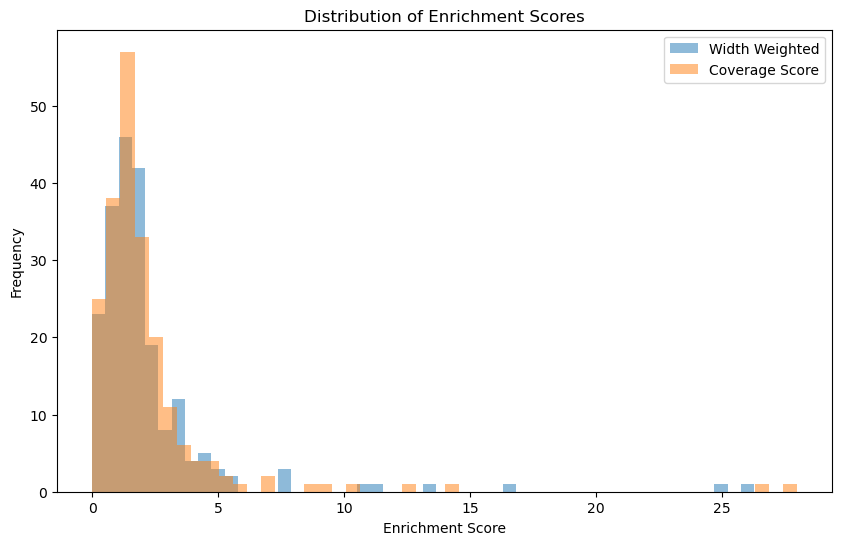

In [69]:
# Plot histograms of enrichment scores
plt.figure(figsize=(10, 6))

plt.hist(neu_width_weighted_2.enrichment_score, alpha=0.5, label='Width Weighted', bins=50)
plt.hist(neu_coverage_score_2.enrichment_score, alpha=0.5, label='Coverage Score', bins=50)

plt.xlabel('Enrichment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Enrichment Scores')
plt.legend()